# Lecture 8
- Central limit theorem

In [57]:

import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

In [58]:
# For the simple motivating example
import matplotlib.ticker as ticker  # Import ticker for formatting


In [59]:
E = stats.expon(scale= 4)
E.mean()

4.0

# First, can we use simulation to solve this question?
A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

In [60]:
n=100 # the total number of parts.

# define the random variable for the time needed for processing one part.
X = stats.uniform(loc =1, scale = 4)
mu = X.mean()
sigma = X.std()# standard deviation, recall variance = sigma**2
mu, sigma

(3.0, 1.1547005383792515)

In [61]:
# todo implement a simulation to compute the probability
num_sims = 10_000 
count=0
for i in range(num_sims):
    Xseq = X.rvs(size = n)
    if np.sum(Xseq) <= 320: 
        count += 1
print("The relative frequency of processing at least 100 parts in 320 time unit", count/num_sims)

The relative frequency of processing at least 100 parts in 320 time unit 0.9604


In [62]:
def getSn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq = X.rvs(size = n)
        Sn[i] = np.sum(Xseq)
    return Sn

(array([  1.,   3.,   5.,  13.,  33.,  45., 101., 147., 257., 334., 492.,
        649., 700., 890., 984., 977., 930., 814., 755., 573., 466., 327.,
        216., 138.,  74.,  33.,  23.,  10.,   7.,   3.]),
 array([2861.27233765, 2870.31948844, 2879.36663922, 2888.41379   ,
        2897.46094079, 2906.50809157, 2915.55524235, 2924.60239314,
        2933.64954392, 2942.6966947 , 2951.74384549, 2960.79099627,
        2969.83814706, 2978.88529784, 2987.93244862, 2996.97959941,
        3006.02675019, 3015.07390097, 3024.12105176, 3033.16820254,
        3042.21535332, 3051.26250411, 3060.30965489, 3069.35680568,
        3078.40395646, 3087.45110724, 3096.49825803, 3105.54540881,
        3114.59255959, 3123.63971038, 3132.68686116]),
 <BarContainer object of 30 artists>)

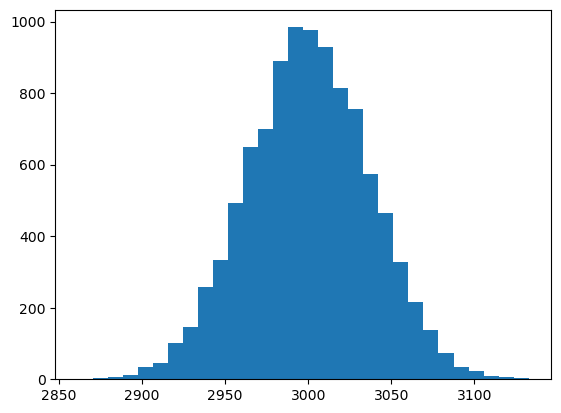

In [63]:
Sn = getSn(1000)
plt.hist(Sn, bins = 30, label='Sn[i]')

In [64]:
def getSnMnZn(n): 
    num_sims = 10_000
    Sn = np.zeros(num_sims)
    Mn = np.zeros(num_sims)
    Zn = np.zeros(num_sims)
    for i in range(num_sims):
        Xseq=  X.rvs(n) 
        Sn[i] =  np.sum(Xseq)
        Mn[i] =  Sn[i]/n
        Zn[i] =  (Sn[i] - n*mu)/(sigma*np.sqrt(n))
    return Sn, Mn, Zn

(array([0.00081462, 0.00162925, 0.00081462, 0.0032585 , 0.00488775,
        0.01384862, 0.02688261, 0.04521167, 0.07290891, 0.10875239,
        0.15640794, 0.23746309, 0.25660677, 0.33399612, 0.37024691,
        0.37106154, 0.40975621, 0.36821035, 0.34132774, 0.26923345,
        0.22809491, 0.16984924, 0.11486208, 0.06761385, 0.04398973,
        0.02443874, 0.01832906, 0.00570237, 0.00610969, 0.00081462]),
 array([-3.91459315, -3.66908131, -3.42356947, -3.17805764, -2.9325458 ,
        -2.68703396, -2.44152213, -2.19601029, -1.95049845, -1.70498662,
        -1.45947478, -1.21396294, -0.96845111, -0.72293927, -0.47742743,
        -0.2319156 ,  0.01359624,  0.25910808,  0.50461991,  0.75013175,
         0.99564359,  1.24115542,  1.48666726,  1.7321791 ,  1.97769093,
         2.22320277,  2.46871461,  2.71422644,  2.95973828,  3.20525012,
         3.45076195]),
 <BarContainer object of 30 artists>)

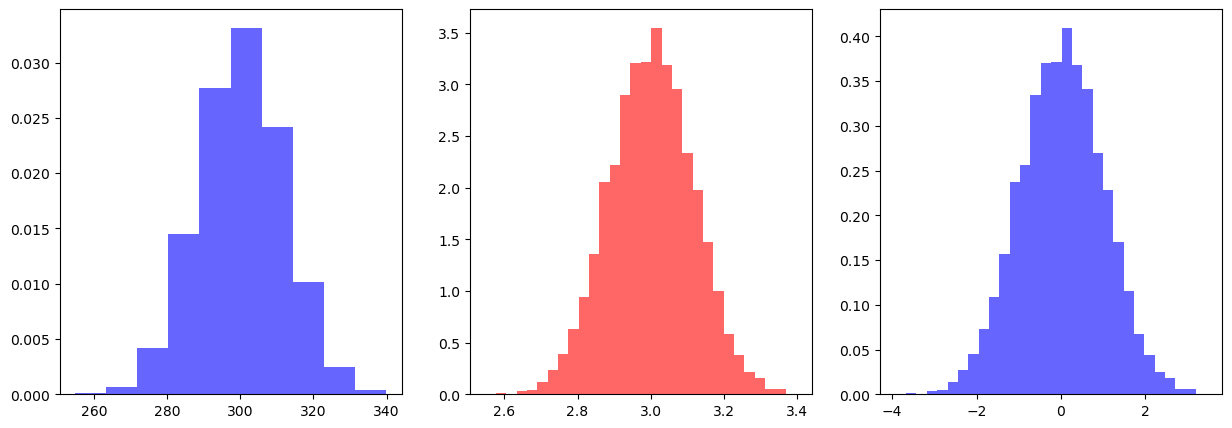

In [65]:
#PLOTING
Sn, Mn, Zn = getSnMnZn(100)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(Sn, density=True, alpha=0.6, color='blue', label='Sn[i]')
axes[1].hist(Mn, bins=30, density=True, alpha=0.6, color='red', label='Mn[i]')
axes[2].hist(Zn, bins=30, density=True, alpha=0.6, color='blue', label='Zn[i]')


In [66]:
from ipywidgets import interactive

In [67]:
def uplotMn(n):
    _, Mn, _ = getSnMnZn(n)
    plt.hist(Mn, bins=30)
    plt.xlim(-0.1, 6)
    
interactive_plot = interactive(uplotMn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

In [68]:
def uplotSn(n):
    Sn,_, _ = getSnMnZn(n)
    plt.hist(Sn, bins=30)
    plt.xlim(-0.1,2500)
    
interactive_plot = interactive(uplotSn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

In [69]:
def uplotZn(n):
    _,_, Zn = getSnMnZn(n)
    plt.hist(Zn, bins=30)
    plt.xlim(-5,5)
    
interactive_plot = interactive(uplotZn, n=100)
interactive_plot

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

## Revisit our problem

A machine process parts, one at a time, in a time independently and uniformly distributed in [1,5]. 
What is the probability the machine processes at least 100 parts in 320 time units? 

In [70]:
X0 = stats.uniform(loc = 1, scale = 4)
mu= X0.mean()
sigma = X0.std()

In [71]:
Zn = stats.norm(loc= 0, scale =1) 

In [72]:
threshold = (320 - n*mu)/(sigma*np.sqrt(n))

In [73]:
Zn.cdf(threshold) # probability of at least 100 parts in 320 time units

0.9583677416682248

## Example: customer support

A call center receives customer calls according to an exponential distribution with a mean wait time of 4 minutes.
Questions:
1. If a single customer calls, what is the probability that they wait more than 5 minutes?
2. If we take a random sample of 40 customers, what is the probability that their average wait time is more than 5 minutes? 

In [74]:
W = stats.expon(scale = 4) # scale is average wait time
#1  P(W >5)
W.sf(5)

0.2865047968601901

In [75]:
# 2. CONSTRUCT Gaussian for Mn
muW = W.mean()
sigmaW = W.std()
n = 40
M40 = stats.norm(loc=muW, scale = np.sqrt(sigmaW**2/n))
M40.sf(5)

0.056923149003329024

## Polling

$p$: The fraction of population that will vote "yes".

$X_i$: The i-th person's vote 

* What random variable $X_i$ is?

$n$: the number of samples we collect .

$M_n$: The fraction of "Yes" in the sample.

Question: What is the number of samples we need to collect so that 
$P(|M_n- p|\le 0.01)>0.95$

In [77]:
G0 = stats.norm()
d =G0.isf(0.025) #P(G0>d)<0.025
d

1.9599639845400545

In [ ]:
# FIND THE NUMBER OF SAMPLES.

9604.0

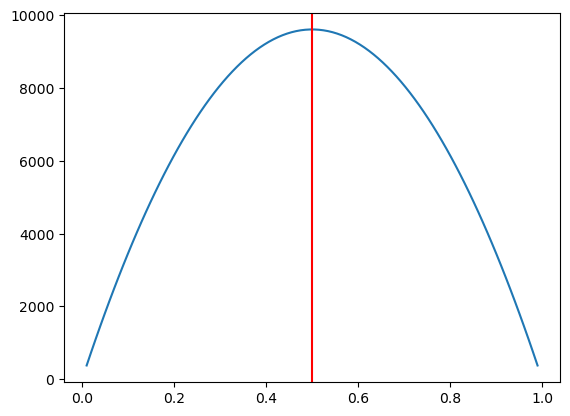

In [81]:
p_value = np.linspace(0.01, 0.99, 100)
n_value = (1.96/0.01 * np.sqrt(p_value*(1- p_value)))**2
plt.plot(p_value, n_value)
plt.axvline(x=0.5, color= 'r', label="max at p=0.5")
n_max = (1.96/0.01 * np.sqrt(0.5*(1- 0.5)))**2
n_max